---
toc: false
page-layout: full
---

# Week 7A<br>Getting Data, Part 2: Working with APIs

- Section 401
- Monday Oct 16, 2023

**Week #7 Agenda**

- Introduction to APIs
- Pulling census data and shape files using Python
    - Exercise: Lead poisoning in Philadelphia
- Natural language processing via Philly's 311 API
    - Word frequencies
    - Sentiment analysis

::: {.callout-important}

Update your local environment!

- Small update to the course's Python environment
- Update the environment on your laptop using [these instructions](https://musa-550-fall-2023.github.io/resource/mamba.html#updating-an-existing-environment) on course website

:::

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

from matplotlib import pyplot as plt
import seaborn as sns

import hvplot.pandas
import holoviews as hv

In [4]:
# Show all columns
pd.options.display.max_columns = 999

## Part 1: Introduction to APIs

Or, how to pull data from the web using Python

**Application programming interface (API):**

> (noun): A particular set of rules and specifications that software programs can follow to communicate with each other and exchange data.

**Example APIs**

- Socrata Open Data: [https://dev.socrata.com/](https://dev.socrata.com/)
- Open Data Philly: [https://opendataphilly.org](https://opendataphilly.org)
- US Census Bureau: [https://www.census.gov/data/developers/data-sets.html](https://www.census.gov/data/developers/data-sets.html)
- Bureau of Labor Statistics: [https://www.bls.gov/developers/](https://www.bls.gov/developers/)
- US Geological Survey: [https://www.usgs.gov/products/data-and-tools/apis](https://www.usgs.gov/products/data-and-tools/apis)
- US Environmental Protection Agency: [https://www.epa.gov/enviro/web-services](https://www.epa.gov/enviro/web-services)
- Google APIs: [https://console.cloud.google.com/apis/library](https://console.cloud.google.com/apis/library)
- Facebook: [https://developers.facebook.com/docs/apis-and-sdks/](https://developers.facebook.com/docs/apis-and-sdks/)
- Twitter: [https://developer.twitter.com/en/docs/api-reference-index.html](https://developer.twitter.com/en/docs/api-reference-index) (RIP 💀)
- Foursquare: [https://developer.foursquare.com/](https://developer.foursquare.com/)
- Instagram: [https://www.instagram.com/developer/](https://www.instagram.com/developer/)
- Yelp: [https://www.yelp.com/developers](https://www.instagram.com/developer/)

::: {.callout-note}

When accessing data via API, many services will require you to register an API key to prevent you from overloading the service with requests.

:::

###  Example #1: Automated data feeds

The simplest form of API is when data providers maintain data files via a URL that are automatically updated with new data over time. 

#### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes, and data is provided in GeoJSON format over the web. 

The API has a separate endpoint for each version of the data that users might want. No authentication is required.

API documentation:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php](http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

Sample API endpoint, for magnitude 4.5+ earthquakes in past day:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson](http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson)

GeoPandas can read GeoJSON files from the web directly. Simply pass the URL to the `gpd.read_file()` function:

In [5]:
# Download data on magnitude 2.5+ quakes from the past week
endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
earthquakes = gpd.read_file(endpoint_url)

In [6]:
earthquakes.head() 

,id,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,nn00867368,3.00,"6 km ESE of Spanish Springs, Nevada",1697413984949,1697417149294,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,107.0,3.8,NaN,NaN,reviewed,0,179,nn,00867368,",nn00867368,us6000lft4,",",nn,us,",",dyfi,origin,phase-data,",37.0,0.1310,0.1763,88.38,ml,earthquake,"M 3.0 - 6 km ESE of Spanish Springs, Nevada",POINT Z (-119.63990 39.61890 8.60000)
1,pr2023288001,3.76,"53 km SE of Punta Cana, Dominican Republic",1697413355310,1697414570972,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,218,pr,2023288001,",us6000lft3,pr2023288001,",",us,pr,",",origin,phase-data,",14.0,0.2338,0.2400,140.00,md,earthquake,"M 3.8 - 53 km SE of Punta Cana, Dominican Repu...",POINT Z (-67.99060 18.30310 89.00000)
2,us6000lfsy,4.40,"106 km SSW of Calama, Chile",1697411570380,1697412082040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,298,us,6000lfsy,",us6000lfsy,",",us,",",origin,phase-data,",20.0,0.7020,0.7400,134.00,mb,earthquake,"M 4.4 - 106 km SSW of Calama, Chile",POINT Z (-69.28150 -23.35760 92.81700)
3,us6000lfsv,4.90,"108 km S of Puerto El Triunfo, El Salvador",1697409880716,1697410968040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,369,us,6000lfsv,",us6000lfsv,",",us,",",origin,phase-data,",55.0,1.1750,0.8500,151.00,mb,earthquake,"M 4.9 - 108 km S of Puerto El Triunfo, El Salv...",POINT Z (-88.51080 12.30150 46.09700)
4,pr2023288000,3.72,"63 km N of Hatillo, Puerto Rico",1697408192010,1697409882040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.0,NaN,NaN,reviewed,0,213,pr,2023288000,",pr2023288000,us6000lfsp,",",pr,us,",",dyfi,origin,phase-data,",16.0,0.6249,0.4500,238.00,md,earthquake,"M 3.7 - 63 km N of Hatillo, Puerto Rico",POINT Z (-66.75960 19.05810 45.00000)


Let's explore the data interactively with Folium:

In [7]:
earthquakes.explore()

Lots of other automated feeds available, updated every minute:


![](imgs/usgs-1.png){width=312}
![](imgs/usgs-2.png){width=300}


### Example #2: The CARTO API

- Philadelphia hosts the majority of its open data on OpenDataPhilly in the cloud using CARTO
- They provide an API to download the data
- You can access the API documentation on the dataset page on OpenDataPhilly

For example: shooting victims in Philadelphia

[https://www.opendataphilly.org/dataset/shooting-victims](https://www.opendataphilly.org/dataset/shooting-victims)

and the API documentation:

[https://cityofphiladelphia.github.io/carto-api-explorer/#shootings](https://cityofphiladelphia.github.io/carto-api-explorer/#shootings)

Let's take a look at the download URL for the data in the GeoJSON format:

![](imgs/shooting-victims-api.png){width=500}


#### The anatomy of an API request

![](imgs/carto-api.png){width="900"}



- **Base URL**: shown in blue
- **?**: shown in purple; it separates the base URL from the query parameters
- **Query parameters**: underlined in red; these parameters allow the user to customize the data response
- **&**: underlined in green; the separator between the query parameters

So, let's break down the URL into its component parts:

In [8]:
# The API endpoint
carto_api_endpoint = "https://phl.carto.com/api/v2/sql"

# The query parameters
params = {
    "q": "SELECT *, ST_Y(the_geom) AS lat, ST_X(the_geom) AS lng FROM shootings",
    "format": "geojson",
    "skipfields": "cartodb_id",
    # Note: we won't need the filename parameter, since we're not saving the data to a file
    # "filename": "shootings"
}

::: {.callout-note}
### Note: SQL Queries

The `q` parameter is a *SQL query*. It allows you to select a specific subset of data from the larger database.

CARTO API documentation: [https://carto.com/developers/sql-api/](https://carto.com/developers/sql-api/)

SQL documentation: [https://www.postgresql.org/docs/9.1/sql.html](https://www.postgresql.org/docs/9.1/sql.html)

**General Query Syntax**

`SELECT [field names] FROM [table name] WHERE [query]`
:::

#### Let's try it out in Python

We'll use Python's `requests` library to use a "get" request to query the API endpoint with our desired query. Similar to our web scraping requests!

In [9]:
import requests

Let's make the get request and pass the query parameters via the `params` keyword:

In [10]:
response = requests.get(carto_api_endpoint, params=params)

response

<Response [200]>

In [11]:
# Get the returned data in JSON format
# This is a dictionary
features = response.json()

In [12]:
type(features)

dict

In [13]:
# What are the keys?
list(features.keys())

['type', 'features']

In [14]:
features['type']

'FeatureCollection'

In [15]:
# Let's look at the first feature
features['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.13101, 40.02566]},
 'properties': {'objectid': 10783622,
  'year': 2020,
  'dc_key': '202035076243.0',
  'code': '411',
  'date_': '2020-09-16T00:00:00Z',
  'time': '21:51:00',
  'race': 'B',
  'sex': 'M',
  'age': '30',
  'wound': 'Multiple/Head',
  'officer_involved': 'N',
  'offender_injured': 'N',
  'offender_deceased': 'N',
  'location': '4900 BLOCK N 4TH ST',
  'latino': 0,
  'point_x': -75.13100961,
  'point_y': 40.02565991,
  'dist': '35',
  'inside': 0,
  'outside': 1,
  'fatal': 0,
  'lat': 40.02565991,
  'lng': -75.13100961}}

Use the `GeoDataFrame.from_features()` function to create a GeoDataFrame.

In [16]:
shootings = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")


::: {.callout-important}
Don't forget to specify the CRS of the input data when using `GeoDataFrame.from_features()`.
:::

In [17]:
shootings.head()

,geometry,objectid,year,dc_key,code,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal,lat,lng
0,POINT (-75.13101 40.02566),10783622,2020,202035076243.0,411,2020-09-16T00:00:00Z,21:51:00,B,M,30,Multiple/Head,N,N,N,4900 BLOCK N 4TH ST,0.0,-75.131010,40.025660,35,0.0,1.0,0.0,40.025660,-75.131010
1,POINT (-75.15440 40.05357),10783623,2020,202035077376.0,411,2020-09-20T00:00:00Z,19:36:00,B,M,25,Stomach,N,N,N,6500 BLOCK N LAMBERT ST,0.0,-75.154402,40.053567,35,0.0,1.0,0.0,40.053567,-75.154402
2,POINT (-75.14464 40.03694),10783624,2020,202035079085.0,411,2020-09-26T00:00:00Z,17:50:00,B,M,24,Back,N,N,N,5500 BLOCK OLD YORK RD,0.0,-75.144636,40.036944,35,0.0,1.0,0.0,40.036944,-75.144636
3,POINT (-75.15364 40.05130),10783625,2020,202035069987.0,411,2020-08-26T00:00:00Z,21:03:00,B,M,18,Head,N,N,N,6300 BLOCK N WOODSTOCK ST,0.0,-75.153639,40.051295,35,1.0,0.0,0.0,40.051295,-75.153639
4,POINT (-75.15714 40.04330),10783626,2020,202035076826.0,411,2020-09-18T00:00:00Z,20:19:00,B,M,42,Hip,N,N,N,2100 BLOCK W GRANGE ST,0.0,-75.157136,40.043303,35,0.0,1.0,0.0,40.043303,-75.157136


#### At-Home Exercise: Visualizing shootings data

**Step 1: Prep the data**

- Drop rows where the geometry is NaN
- Convert to a better CRS (e.g., 3857)
- Trim to those only within city limits (some shootings have wrong coordinates, outside Philadelphia!)

In [18]:
# Load the city limits from open data philly
city_limits = gpd.read_file(
    "https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson"
).to_crs(epsg=3857)

In [19]:
# make sure we remove missing geometries
shootings = shootings.dropna(subset=['geometry'])

# convert to a better CRS
shootings = shootings.to_crs(epsg=3857)

In [20]:
# Remove any shootings that are outside the city limits
shootings = gpd.sjoin(shootings, city_limits, predicate='within', how='inner').drop(columns=['index_right'])

**Step 2: Plot the points**

A quick plot with geopandas to show the shootings as points

NameError: name 'zip_codes' is not defined

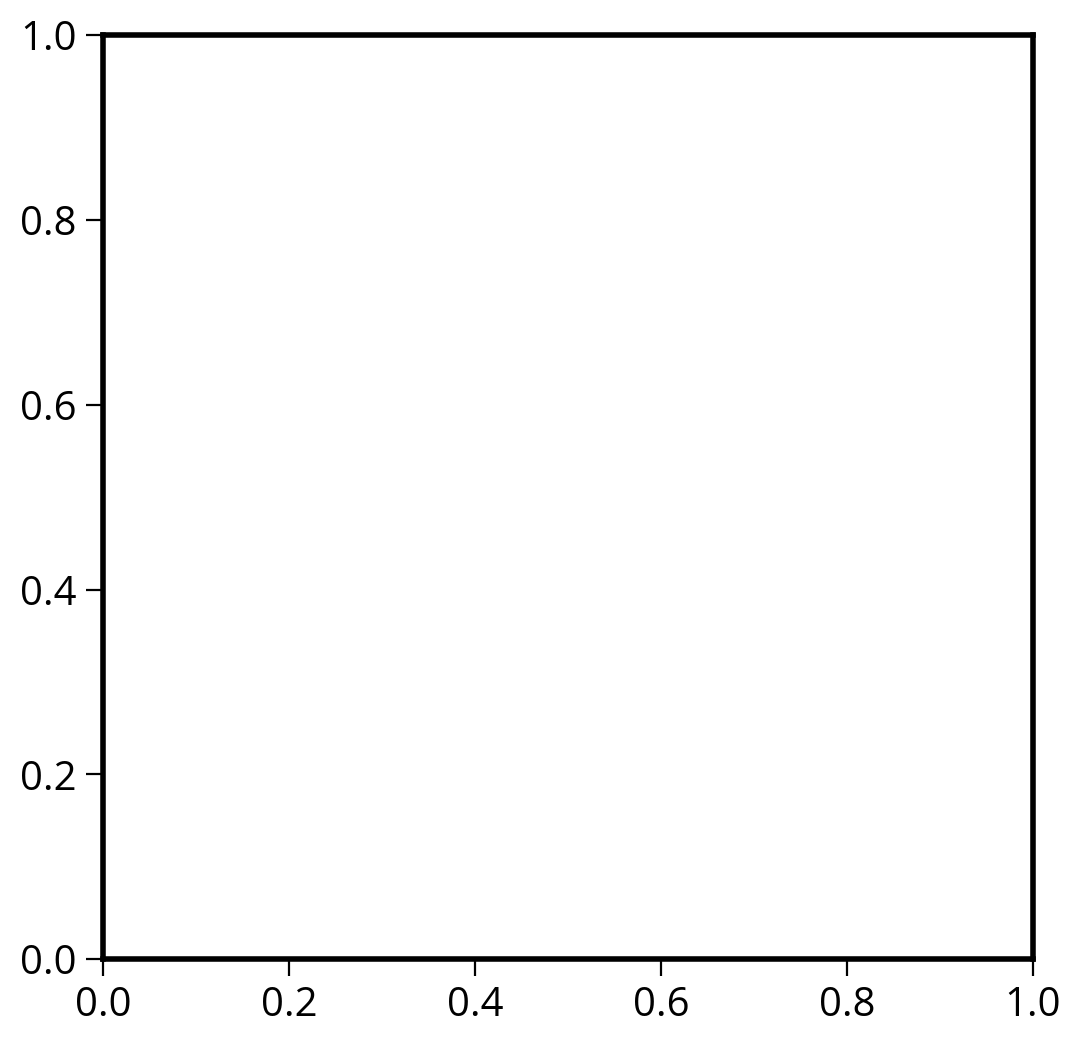

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))

# ZIP codes
zip_codes.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black")

# Shootings
shootings.plot(ax=ax, color="crimson", markersize=10, alpha=0.4)
ax.set_axis_off()

**Step 3: Make a (more useful) hex bin map**

In [ ]:
# initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap('viridis')(0))

# convert to Web Mercator and plot the hexbins 
x = shootings.geometry.x
y = shootings.geometry.y
ax.hexbin(x, y, gridsize=40, mincnt=1, cmap='viridis')

# overlay the ZIP codes
zip_codes.to_crs(epsg=3857).plot(ax=ax, 
                                 facecolor='none', 
                                 linewidth=0.5,
                                 edgecolor='white')

ax.set_axis_off()

#### Example: Count the total number of rows in a table

The SQL `COUNT` function can be applied to count all rows.

In [ ]:
response = requests.get(
    carto_api_endpoint, params={"q": "SELECT COUNT(*) FROM shootings"}
)

In [ ]:
response.json()

::: {.callout-tip}
It's always a good idea to check how many rows you might be downloading before requesting all of the data from an API!
:::

#### Example: Select all columns, limiting the total number returned

The `LIMIT` function limits the number of returned rows. It is very useful for taking a quick look at the format of a database.

In [ ]:
# Limit the returned data to only 1 row
query = "SELECT * FROM shootings LIMIT 1"

# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

Create the GeoDataFrame:

In [ ]:
df = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

df

#### Example: Select by specific column values

Use the `WHERE` function to select a subset where the logical condition is true.

Example #1: Select nonfatal shootings only

In [ ]:
# Select nonfatal shootings only
query = "SELECT * FROM shootings WHERE fatal = 0"

In [ ]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
nonfatal = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of nonfatal shootings = ", len(nonfatal))

Example #2: Select shootings in 2023

In [ ]:
# Select based on "date_"
query = "SELECT * FROM shootings WHERE date_ >= '1/1/23'"

In [ ]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
shootings_2023 = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of shootings in 2023 = ", len(shootings_2023))

#### At-Home Exercise: Explore trends by month and day of week

##### Step 1: Convert the date column to `DateTime` objects

Add Month and Day of Week columns

In [ ]:
# Convert the data column to a datetime object
shootings['date'] = pd.to_datetime(shootings['date_'])

In [ ]:
# Add new columns: Month and Day of Week
shootings["Month"] = shootings["date"].dt.month
shootings["Day of Week"] = shootings["date"].dt.dayofweek  # Monday is 0, Sunday is 6

##### Step 2: Calculate number of shootings by month and day of week

Use the familiar Groupby --> size()

In [ ]:
count = shootings.groupby(["Month", "Day of Week"]).size()
count = count.reset_index(name="Count")
count.head()

##### Step 3: Make a heatmap using `hvplot`

In [ ]:
# Remember 0 is Monday and 6 is Sunday
count.hvplot.heatmap(
    x="Day of Week",
    y="Month",
    C="Count",
    cmap="viridis",
    width=400,
    height=500,
    flip_yaxis=True,
)

**Trends:** more shootings on the weekends and in the summer months

### Example #3: GeoServices

A GeoService is a standardized format for returning GeoJSON files over the web

Originally developed by Esri, in 2010 the specification was transferred to the Open Web Foundation.

Documentation: [http://geoservices.github.io/](http://geoservices.github.io/)

#### Example: Philadelphia neighborhoods

OpenDataPhilly provides GeoService API endpoints for the geometry hosted on its platform

[https://opendataphilly.org/datasets/philadelphia-neighborhoods/](https://opendataphilly.org/datasets/philadelphia-neighborhoods/)

In [ ]:
# The base URL for the neighborhoods layer
neighborhood_url = "https://services1.arcgis.com/a6oRSxEw6eIY5Zfb/arcgis/rest/services/Philadelphia_Neighborhoods/FeatureServer/0"

![](imgs/geoservices-1.png){width="800"}

Source: [https://geoservices.github.io/resources.html](https://geoservices.github.io/resources.html)

#### The `query/` endpoint

Layers have a single endpoint for requesting features: the `/query` endpoint.


In [ ]:
neighborhood_query_endpoint = neighborhood_url + "/query"

#### The allowed parameters

The main request parameters are:

- `where`: A SQL-like string to select a subset of features; to get all data, use `1=1` (always True)
- `outFields`: The list of columns to return; to get all, use `*`
- `f`: The returned format; for GeoJSON, use "geojson"
- `outSR`: The desired output CRS

In [ ]:
params = {
    "where": "1=1",  # Give me all parameters
    "outFields": "*",  # All fields
    "f": "geojson",  # GeoJSON format
    "outSR": "4326", # The desired output CRS
}

Make the request:

In [ ]:
r = requests.get(neighborhood_query_endpoint, params=params)

Get the features and create the GeoDataFrame:

In [ ]:
json = r.json()

features = json['features']

In [ ]:
hoods = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

In [ ]:
hoods

Now let's select data just for East Falls and subset the returned columns:

In [ ]:
params = {
    "where": "LISTNAME = 'East Falls'",
    "outFields": ["LISTNAME"],
    "f": "geojson",
    "outSR": "4326",
}

r = requests.get(neighborhood_query_endpoint, params=params)

In [ ]:
east_falls = gpd.GeoDataFrame.from_features(r.json()["features"], crs="EPSG:4326")

east_falls

## Part 2: The Census API

### US Census data is foundational

- Rich data sets with annual releases
- Decennial results plus American Community Survey (ACS) results
- Wide range of topics covered: sex, income, poverty, education, housing

### Getting census data (the old way)<br>American Factfinder

<center>
<a href=https://factfinder.census.gov><img src="imgs/census-1.png" width=700></img></a>
</center>

### Getting census data (the new way)<br>census.data.gov

<center>
    <a href=https://data.census.gov/><img src="imgs/census-2.png" width=700></img></a>
</center>

### Example: poverty data
<center>
    <a href="https://data.census.gov/table/ACSST1Y2021.S1701?q=poverty+status&g=010XX00US$0400000&tid=ACSST1Y2021.S1701"><img src="imgs/poverty-1.png" width=900></img></a>
</center>

#### Via the API

[https://api.census.gov/data/2021/acs/acs1?get=NAME,B17001_002E&for=state:*](https://api.census.gov/data/2021/acs/acs1?get=NAME,B17001_002E&for=state:*)

- **Base endpoint:** https://api.census.gov/data/2021/acs/acs1
- **Request parameters:** "get", "for"

![](imgs/poverty-2.png)

### How to find the right variable names?

The census provides web-based documentation:

- Overview of all data tables: [https://api.census.gov/data.html](https://api.census.gov/data.html)
- All data tables for 2021: [https://api.census.gov/data/2021.html](https://api.census.gov/data/2021.html)
- All variables for 2021 ACS 5-year data set: [https://api.census.gov/data/2021/acs/acs5/variables.html](https://api.census.gov/data/2021/acs/acs5/variables.html)

### A detailed Census API guide

[https://www.census.gov/data/developers/guidance/api-user-guide.html](https://www.census.gov/data/developers/guidance/api-user-guide.html)

### Accessing the API is easier from Python

Several packages provide easier Python interfaces to census data based on the census API.

We'll focus on **`cenpy` - "Explore and download data from Census APIs"**
 - [Documentation](https://cenpy-devs.github.io/cenpy/)
 - [GitHub](https://github.com/cenpy-devs/cenpy)

### Example: the racial "dot" map

![](imgs/racial-dot-map.png)

Source: [Washington Post](https://www.washingtonpost.com/graphics/2018/national/segregation-us-cities/)

Let's make this for Philadelphia in Python!

In [ ]:
# First step: import cenpy
import cenpy

#### The "explorer" module

Functions to help you explore the Census API from Python

- [`cenpy.explorer.available`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.available.html#cenpy.explorer.available): Returns information about available datasets in Census API
- [`cenpy.explorer.explain`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.explain.html#cenpy.explorer.explain): Explain a specific Census dataset
- [`cenpy.explorer.fips_table`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.fips_table.html#cenpy.explorer.fips_table): Get a table of FIPS codes for a specific geography

**Note: we can change pandas display options to see all rows/columns and large cells**

In [ ]:
# UNCOMMENT TO SEE ALL ROWS/COLUMNS IN DATAFRAMES
# pd.options.display.max_rows = 9999 
# pd.options.display.max_colwidth = 200

#### Step 1: Identify what dataset we want

- Today, we'll use the 5-year American Community Survey (latest available year: 2021)
- Other common datasets: 
    - 1-year ACS datasets as well (latest available year: 2022)
    - 10-year decennial survey (latest available year: 2020)

In [ ]:
available = cenpy.explorer.available()

available.head()

We can use the pandas [`filter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html) to search for specific identifiers in the dataframe. 

In this case, let's search for the American Community Survey datasets. We'll match index labels using *regular expressions*. 

In particular, we'll search for labels that start with "ACS". In the language of regular expressions, we'll use the "^" to mean "match labels that start with"

For more info on regular expressions, the [documentation for the re module](https://docs.python.org/3/library/re.html) is a good place to start.

In [ ]:
# Return a dataframe of all datasets that start with "ACS"
# Axis=0 means to filter the index labels!
acs = available.filter(regex="^ACS", axis=0)

acs

Many flavors of ACS datasets are available — we want to use the *detailed tables* version, specifically the 5-year survey. 

The relevant identifiers start with: "ACSDT5Y".

In [ ]:
# Return a dataframe of all datasets that start with "ACSDT5Y"
available.filter(regex="^ACSDT5Y", axis=0)

Let's use the latest available 5-year data (2021). We can use the `explain()` function to print out a description of the dataset:

In [ ]:
cenpy.explorer.explain("ACSDT5Y2021")

#### Step 2: Initialize the API connection

Use the `cenpy.remote.APIConnection` object, and pass it the name of the dataset.

In [ ]:
acs = cenpy.remote.APIConnection("ACSDT5Y2021")

#### Step 3: Find the variables we want to load

The `.variables` attribute stores the available variables (across all Census tables). 

We can use the `varslike()` function to search the `variables` dataframe (it's just a simple wrapper around the pandas `filter()` function).

In [ ]:
len(acs.variables)

In [ ]:
acs.variables.head(n=10)

We're interested in variables about hispanic origin broken down by race — let's see if we can find the variables where the "Concept" column starts with "RACE"

In [ ]:
acs.varslike?

In [ ]:
race_matches = acs.varslike(
    pattern="HISPANIC OR LATINO ORIGIN BY RACE",
    by="concept",  # searches along concept column
).sort_index()

In [ ]:
race_matches

It looks like the table we want is "B03002" — we can also easily filter for all variables in this table

In [ ]:
variables = [
    "NAME",
    "B03002_001E", # Total
    "B03002_003E", # Not Hispanic, White
    "B03002_004E", # Not Hispanic, Black
    "B03002_005E", # Not Hispanic, American Indian
    "B03002_006E", # Not Hispanic, Asian
    "B03002_007E", # Not Hispanic, Native Hawaiian
    "B03002_008E", # Not Hispanic, Other
    "B03002_009E", # Not Hispanic, Two or More Races
    "B03002_012E", # Hispanic
]

::: {.callout-note}
We've also include the "NAME" variable which returns the name of the Census geography we are querying for.
:::

#### Step 4: Identify the geographies to use

The Census API use heirarchy of geographies when requesting data.

For example, you cannot just request data for a specific county — you need to specify the state *and* the county.

<img src="imgs/census-hierarchy.png" width=700></img>

**Common hierarchies**

- State --> county
- State --> place (e.g., cities)
- State --> county --> tract
- State --> county --> tract --> block group

**Tip:** Use the `.geographies` attribute

This allows you to see:

1. What geographies are available for a specific dataset
1. The other required geographies in the heirarchy

In [ ]:
acs.geographies['fips']

For the racial dot map, we'll use the most granular available geography: block group.

The hierarchy is: state --> county --> tract --> block group but we can use the `*` operator for tracts so we'll need to know the **FIPS codes for PA and Philadelphia County**

In [ ]:
counties = cenpy.explorer.fips_table("COUNTY")
counties.head()

In [ ]:
# Trim to just Philadelphia
# Search for rows where name contains "Philadelphia"
counties.loc[ counties[3].str.contains("Philadelphia") ]

For Philadelphia County, the FIPS codes are:

- Philadelphia County: "101" 
- PA: "42"

In [ ]:
philly_county_code = "101"
pa_state_code = "42"

You can also look up FIPS codes on Google! Wikipedia is usually a trustworthy source...

#### Step 5: Build the query (finally)

We'll use the `.query()` function, which takes the following arguments:

1. `cols` - the list of variables desired from the dataset
1. `geo_unit` - string denoting the smallest geographic unit; syntax is "name:FIPS"
1. `geo_filter` - dictionary containing groupings of geo_units, if required by the hierarchy


In [ ]:
philly_demo_data = acs.query(
    cols=variables,
    geo_unit="block group:*",
    geo_filter={"state": pa_state_code, "county": philly_county_code, "tract": "*"},
)


philly_demo_data.head()

In [ ]:
len(philly_demo_data)

**Important:** data is returned as strings rather than numeric values

In [ ]:
for variable in variables:
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        philly_demo_data[variable] = philly_demo_data[variable].astype(float)

**What if we mess up the geographic hierarchy?**

If you forget to include required parts of the geography heirarchy, you'll get an error!

In [ ]:
acs.query(
    cols=variables,
    geo_unit="block group:*",
    geo_filter={"state": pa_state_code},
)

#### Step 6: We need the block group geometries too!

Use the [`pygris` package](https://walker-data.com/pygris/) to download geometries. It's a port of the R package `tigris` to Python!

In [ ]:
import pygris

There's a function to return each of the main Census geographies. We'll use the `block_groups()` function.

In [ ]:
pygris.block_groups?

In [ ]:
philly_block_groups = pygris.block_groups(
    state=pa_state_code, county=philly_county_code, year=2021
)

In [ ]:
philly_block_groups.head()

In [ ]:
len(philly_block_groups)

#### Step 7: Merge the demographic data with geometries

Merge based on multiple columns: state, county, tract, and block group IDs.

The relevant columns are: 

- "STATEFP", "COUNTYFP", "TRACTCE", "BLKGRCE" in the spatial data
- "state", "county", "tract", "block group" in the non-spatial data

In [ ]:
philly_demo_final = philly_block_groups.merge(
    philly_demo_data,
    left_on=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"],
    right_on=["state", "county", "tract", "block group"],
)

In [ ]:
philly_demo_final.head()

**We're done! Plot it to make sure it makes sense**

Plot the total population using `geopandas.explore()`...

In [ ]:
philly_demo_final.explore(column="B03002_001E", tiles="CartoDB positron")

#### Now let's prep the data for the dot map

1. Rename columns to more user-friendly versions
1. Add a general "Other" category

In [ ]:
# Rename columns
philly_demo_final = philly_demo_final.rename(
    columns={
        "B03002_001E": "Total",  # Total
        "B03002_003E": "White",  # Not Hispanic, White
        "B03002_004E": "Black",  # Not Hispanic, Black
        "B03002_005E": "AI/AN",  # Not Hispanic, American Indian
        "B03002_006E": "Asian",  # Not Hispanic, Asian
        "B03002_007E": "NH/PI",  # Not Hispanic, Native Hawaiian
        "B03002_008E": "Other_",  # Not Hispanic, Other
        "B03002_009E": "Two Plus",  # Not Hispanic, Two or More Races
        "B03002_012E": "Hispanic",  # Hispanic
    }
)

In [ ]:
# Add an "Other" column 
cols = ['AI/AN', 'NH/PI','Other_', 'Two Plus']
philly_demo_final['Other'] = philly_demo_final[cols].sum(axis=1)

#### Define a function to create random points

Given a polygon, create randomly distributed points that fall within the polygon.

In [ ]:
def random_points_in_polygon(number, polygon):
    """
    Generate a random number of points within the 
    specified polygon.
    """
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points

**Random points example**

In [ ]:
# get the first block group polygon in the data set
geo = philly_demo_final.iloc[0].geometry

geo

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# Generate some random points
random_points = random_points_in_polygon(100, geo)

# Plot random points
gpd.GeoSeries(random_points).plot(ax=ax, markersize=20, color="red")

# Plot boundary of block group
gpd.GeoSeries([geo]).plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_axis_off()

In [ ]:
def generate_dot_map(data, people_per_dot):
    """
    Given a GeoDataFrame with demographic columns, generate a dot 
    map according to the population in each geometry.
    """
    results = []
    for field in ["White", "Hispanic", "Black", "Asian", "Other"]:

        # generate random points
        pts = data.apply(
            lambda row: random_points_in_polygon(
                row[field] / people_per_dot, row["geometry"]
            ),
            axis=1,
        )

        # combine into single GeoSeries
        pts = gpd.GeoSeries(pts.apply(pd.Series).stack(), dtype=object, crs=data["geometry"].crs)
        pts.name = "geometry"

        # make into a GeoDataFrame
        pts = gpd.GeoDataFrame(pts)
        pts["field"] = field

        # save
        results.append(pts)

    return gpd.GeoDataFrame(pd.concat(results), crs=data["geometry"].crs).reset_index(
        drop=True
    )

#### Calculate the dot map

In [ ]:
dot_map = generate_dot_map(philly_demo_final, people_per_dot=50)

In [ ]:
print("number of points = ", len(dot_map))

In [ ]:
dot_map.tail()

#### Now let's plot it

In [ ]:
# setup a custom color map from ColorBrewer
from matplotlib.colors import ListedColormap


colors = {
    "Black": "steelblue",
    "White": "tomato",
    "Hispanic": "khaki",
    "Asian": "palegreen",
    "Other": "darkgray",
}

cmap = ListedColormap([t[1] for t in sorted(colors.items())])

In [ ]:
# Convert to 3857
dot_map_3857 = dot_map.to_crs(epsg=3857)

In [ ]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor="#2a2a2a")

# Plot
dot_map_3857.plot(
    ax=ax,
    column="field",
    categorical=True,
    legend=True,
    alpha=1,
    markersize=0.5,
    cmap=cmap,
    legend_kwds=dict(labelcolor="white"),
)

# format
ax.set_title("Philadelphia, PA", fontsize=16, color="white")
ax.text(
    0.5,
    0.95,
    "1 dot = 50 people",
    fontsize=12,
    transform=ax.transAxes,
    ha="center",
    color="white",
)
ax.set_axis_off()

## That's it

To be continued on Wednesday!